### Student Name: Andrew Kim

In [20]:
#import the required modules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

### Step 1 – Load the data and extract the features

In [50]:
features = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 
            'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 
            'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip']

file_path = r'C:\Users\andre\Documents\module04-decision-trees-andrewks95-main\trip_data.csv'
df = pd.read_csv(file_path, usecols=features)

#after the data is loaded in the dataframe, you would normally perform preliminary analysis to verify the data.
# For example, using df.head() and df.describe() but you can skip that step for now. 
#assign the input features to a variable called 'X' and the labels in a variable called 'y'
X = df.iloc[:,0:14].to_numpy() #input features
y = df.iloc[:,14].tolist() #labels

AttributeError: 'numpy.ndarray' object has no attribute 'head'

### Step 2 – Split the data
Hint: use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method from scikit-learn.

In [22]:
seed = 7 #TODO: provide an integer for the random number generator.

#Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, #TODO: provide the test_size (refer to the instructions for the assignment)
                                                     random_state = seed, #seed the random generator for reproducibilty
                                                    stratify = y #TODO: provide the variable
                                                   )

#Note: X_train and y_train are the input features and labels for the training set respectively.
#Note: X_test and y_test are the input features and labels for the test set respectively.

### Step 3 - Create the decision tree
Hint: use the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) in scikit-learn. Here is an example on how to use build a [decision tree for classification](https://scikit-learn.org/stable/modules/tree.html#classification).

In [45]:
#Instantiate the Decision Tree Classifier object 
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', #TODO: choose either 'gini' or 'entropy'
                                       max_depth = 10 #TODO: set the value (refer to the instructions above)
                                      )

#TODO: Train Decision Tree Classifier using the `fit` method
dt_classifier.fit(X_train, y_train)

#TODO: Make predictions with `X_test` and store the result in a variable called `y_pred`
y_pred = dt_classifier.predict(X_test)

#### Evaluate the prediction accuracy
Hint: use the [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) to determine how many observations were classified correctly. Use `y_test` and `y_pred` for the calculations.

In [46]:
#TODO: calculate and display the accuracy score using `y_test` and `y_pred`
print(round(accuracy_score(y_test, y_pred),3) * 100)

83.3


### Step 4 - Visualize the decision tree
Hint: use the export_graphviz method. An [example is shown here](https://scikit-learn.org/stable/modules/tree.html#classification). Alternatively, you may use your preferred library/tool to display the tree.

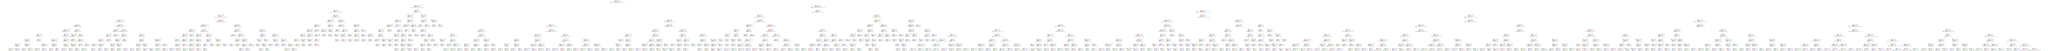

In [51]:
#TODO: Display the decision tree
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt_classifier)
graph = graphviz.Source(dot_data)
graph

### Summarize the results using one paragraph (2-5 sentences)

In [52]:
# In this case, the decision tree classifier has determined, with 83.3% accuracy, whether or not a taxi driver will receive
# a tip or not, based on a number of different input variables such as trip distance, fare amount, and many other factors.
# It has created splits in the data to attempt to gain information through the reduction of entropy to gain certainty about 
# the predictive value of the factors being split.